# ASSIGNMENT: TITANIC DATA ANALYSIS
**Completed By Sakshi Tanwar**
## TASK : CLASSIFICATION


 ### About This Data
* The Titanic dataset provides a detailed account of the passengers aboard the ill-fated ship that sank on April 15, 1912. The data includes information on the passengers' demographics, such as age, gender, passenger class, and embarkation port, as well as their survival status.

 
* After analyzing the data, several trends emerge. The most significant factor that influenced survival was gender, with females having a much higher survival rate than males. Age was also a significant factor, with children having a higher survival rate than adults. Passenger class also played a role, with first-class passengers having a higher survival rate than second or third-class passengers.

  
* The size of the passenger's family also played a role in survival, with those traveling alone having a lower survival rate than those traveling with family members. Embarkation port also had a small effect on survival, with passengers who embarked from Cherbourg having a higher survival rate than those who embarked from Queenstown or Southampton.


*  Overall, the analysis suggests that the profile most likely to survive was a **young female** passenger traveling in **first class** with **1-3 family members**, and embarked from **Cherbourg**. 

**However, it is important to note that these conclusions are based on the available data and may not be representative of the entire population of Titanic passengers.**





## Business Case: Problem understanding and definition

With this database we need to complete the analysis of what group of people were most likely to survive, using Exploratory Data Analysis and Machine Learning.

* Predict whether passenger will survive or not






# TASK:

## 1.Import Necesaary Libraries 

In [210]:
## importing the libraries
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## 1.1 Load the data

In [211]:
df = pd.read_csv("Titanic-Dataset.csv")

In [212]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 2. Data Exploration

##  About Data :

* Passengerird: Unique identifier for each passenger;
* Survived: Binary indicator. 1 means survived
* Pclass: Passenger class (1 - First class; 2- Second Class; 3- Thrid Class;
* Name: Passenger name;
* Sex: Male or Female;
* Age: Number;
* SibSp: Number of brothers - wives on board;
* Parch: Number of parents-children on board;
* Ticket: Ticket number;
* Fare: Price of ticket;
* Cabin: Cabin number;
* Embarked: Place where the passenger boarded (C=Cherbourg, Q= Queenstown, S= Southampton)
   

In [213]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [214]:
df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q







**Data types visualization and localization of missing data**


In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB







**Check duplicated data**

In [216]:
df.duplicated().sum()

0






**Resume statistics**

In [217]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Conclusion:** In the table above we can see that about 38% of the training set survived the Titanic disaster and that the ages of passengers in this set range from 0.42 to 80 years

## 3. Demographic Analysis & Data Visualisation

###  Explore the distribution of passengers based on gender and age.

#### 3.1 Age distribution
**Explore the distribution of ages among the passengers.**

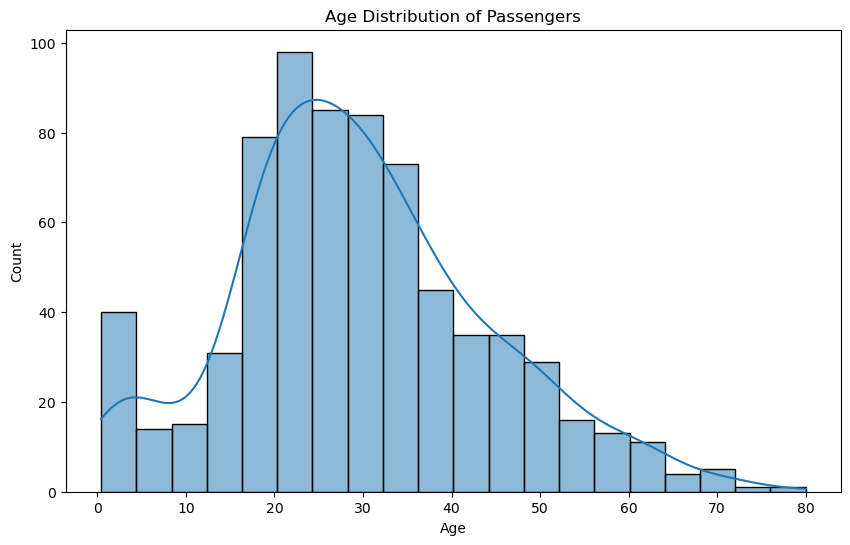

In [221]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


### Insights:
**We can observe the concentration of passengers in different age ranges**.

**Identify the age ranges with the highest density of passengers.**

#### 3.2 Gender Distribution:
**Analyze the distribution of passengers based on gender.**

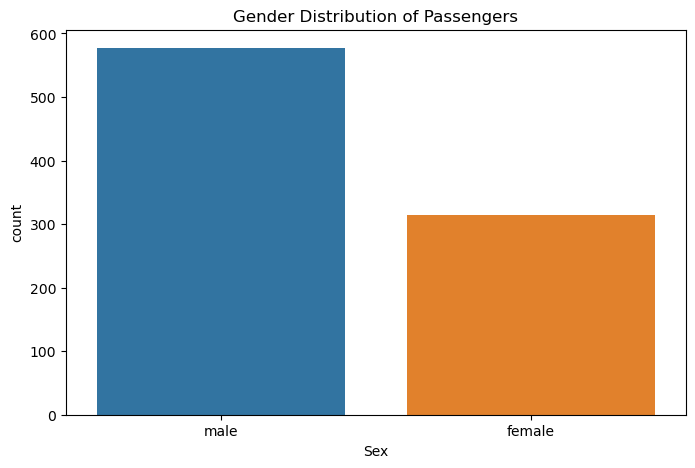

In [222]:
# Gender distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Sex', data=df)
plt.title('Gender Distribution of Passengers')
plt.show()


### Insights:
**The countplot displays the number of passengers for each gender category (Male and Female).**

**The visualization allows us to observe the relative distribution of male and female passengers.**

### 3.3 Calculate the average of passengers

In [223]:
# Calculate the average age of passengers
average_age = df['Age'].mean()

# Print the result
print(f'The average age of passengers is: {average_age:.2f} years')


The average age of passengers is: 29.70 years


### 3.4 Visualize the distribution of passengers in each class.

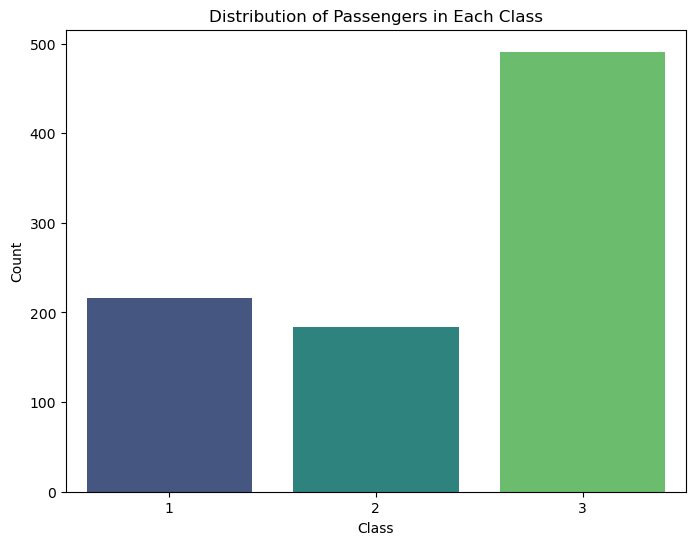

In [224]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot for the distribution of passengers in each class
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', data=df, palette='viridis')
plt.title('Distribution of Passengers in Each Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


### Insights:
**The countplot displays the number of passengers in each passenger class (1st, 2nd, and 3rd).**
**The visualization provides a clear representation of how passengers are distributed across different classes.**






* Survival rate by **Class**

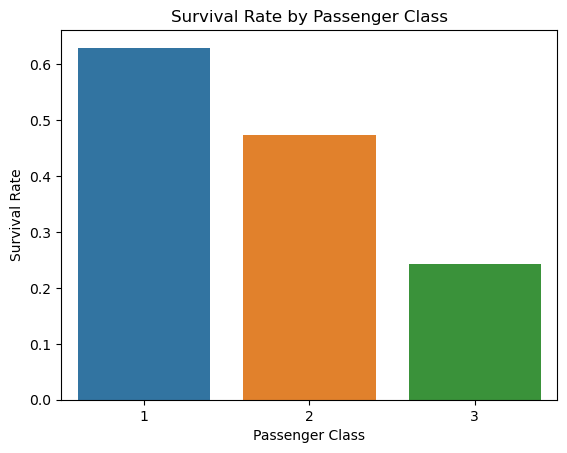

In [225]:
# Calculate survival rate for each passenger class
survival_by_class = df.groupby('Pclass')['Survived'].mean()

# Create bar plot
sns.barplot(x=survival_by_class.index, y=survival_by_class.values)
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Passenger Class')
plt.show()


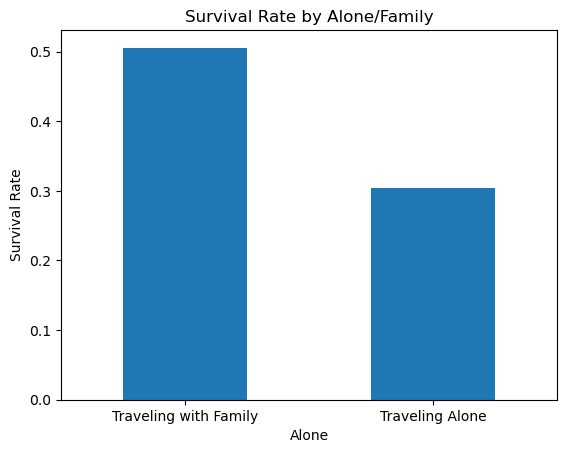

In [226]:
# Check if passenger is traveling alone or with family
df['Family'] = df['SibSp'] + df['Parch']
df['Alone'] = np.where(df['Family'] == 0, 1, 0)

# Create bar plot of survival rate
grouped = df.groupby('Alone')['Survived'].mean()
grouped.plot(kind='bar')
plt.title('Survival Rate by Alone/Family')
plt.ylabel('Survival Rate')
plt.xticks([0, 1], ['Traveling with Family', 'Traveling Alone'], rotation=0)
plt.show()

**From this plot, we can see that passengers traveling with family members had the highest survival rate.**






* Survival rate by **family size**

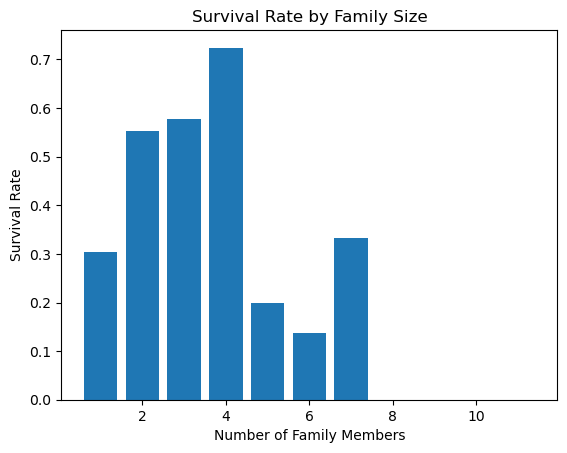

In [227]:
# Calculate total number of family members for each passenger
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Calculate survival rate for each group based on family size
survival_by_family_size = df.groupby('FamilySize')['Survived'].mean()

# Create bar plot of survival rate by family size
plt.bar(survival_by_family_size.index, survival_by_family_size.values)
plt.xlabel('Number of Family Members')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Family Size')
plt.show()

**From this plot, we can see that passengers with 4 family members had the highest survival rate, while passengers traveling alone had the lowest survival rate.**




* Survival rate by **age**

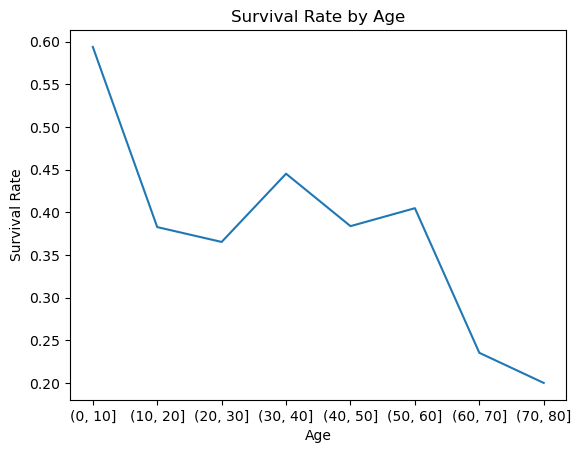

In [228]:
# Remove rows with missing age data
df = df.dropna(subset=['Age'])

# Calculate survival rate for each age group
age_groups = pd.cut(df['Age'], bins=range(0, 90, 10))
survival_by_age = df.groupby(age_groups)['Survived'].mean()

# Create line plot of survival rate by age
plt.plot(survival_by_age.index.astype(str), survival_by_age.values)
plt.xlabel('Age')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Age')
plt.show()



* From this plot, we can see that passengers in their mid-**20s** had the highest survival rate, while **children under 10** and passengers **over 60** had the lowest survival rates.



---
# Conclusion

 Based on the available data in the Titanic dataset, there are several characteristics that are associated with a higher likelihood of survival:

* Gender: Females had a much higher survival rate than males. In fact, the 
survival rate for females was over 70%, while the survival rate for males was just under 20%.

* Age: Passengers who were children (under the age of 18) had a higher survival rate than adults. In addition, passengers in their mid-20s to early 30s also had a higher survival rate than other age groups.

* Passenger Class: Passengers in first class had a higher survival rate than passengers in second or third class.

* Family Size: Passengers who were traveling alone had a lower survival rate than passengers who were traveling with family members. However, passengers who were traveling with too many family members (more than 4) also had a lower survival rate.

* Embarkation Port: Passengers who embarked from Cherbourg (C) had a higher survival rate than passengers who embarked from Queenstown (Q) or Southampton (S).

> Based on these characteristics, the profile that is most likely to survive would be a **female passenger** who is **under the age of 18**, traveling in **first class** with **1-3 family members**, and embarked from **Cherbourg**. 

## 4. Survival Analysis:

#### 4.1 Calculate the Overall Survival Rate:

In [229]:
# Calculate the overall survival rate
overall_survival_rate = df['Survived'].mean()

# Print the result
print(f'The overall survival rate of passengers is: {overall_survival_rate * 100:.2f}%')


The overall survival rate of passengers is: 40.62%


#### 4.2 Explore the Survival Rate Based on Gender:

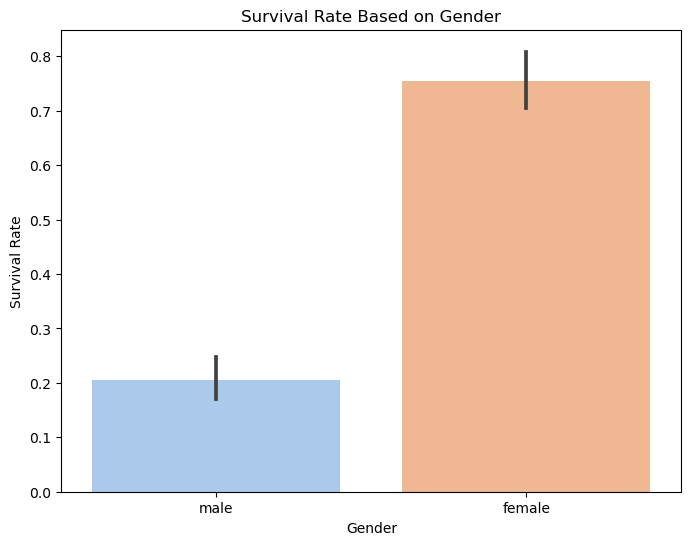

In [230]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot for survival rate by gender
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Survived', data=df, palette='pastel')
plt.title('Survival Rate Based on Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()


#### 4.3 Analyze the Survival Rate in Each Passenger Class:

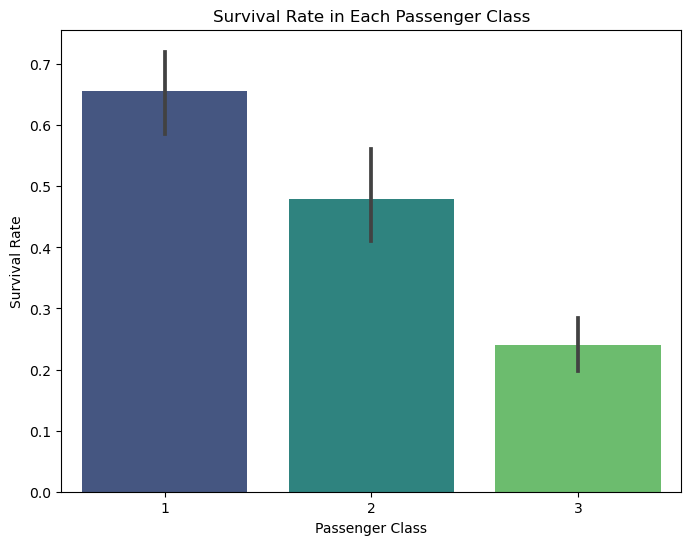

In [231]:
# Bar plot for survival rate by passenger class
plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', data=df, palette='viridis')
plt.title('Survival Rate in Each Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()


### 4.4 Investigate the Relationship Between Age and Survival:

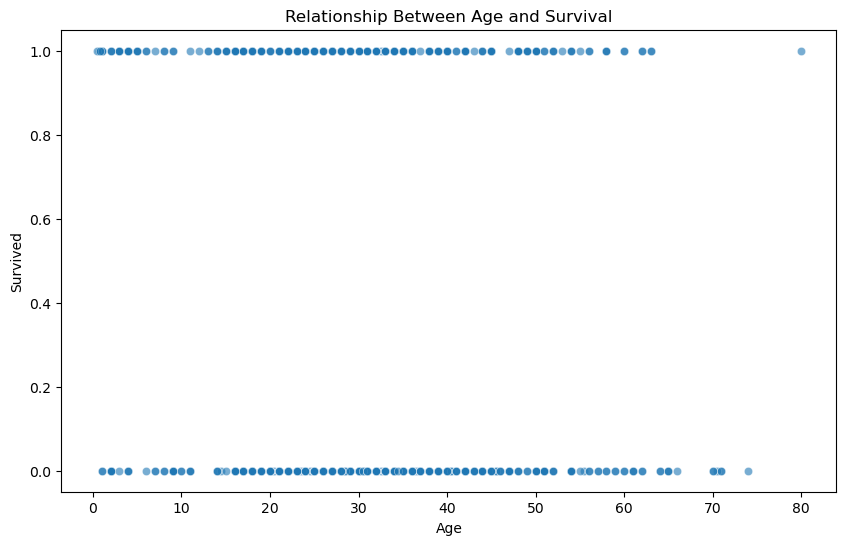

In [232]:
# Scatter plot for age vs. survival
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Survived', data=df, alpha=0.6)
plt.title('Relationship Between Age and Survival')
plt.xlabel('Age')
plt.ylabel('Survived')
plt.show()


In [233]:
df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.530055
2,2,0.440000
0,0,0.371550
3,3,0.333333
4,4,0.166667
5,5,0.000000


In [234]:
df[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.655914
1,2,0.479769
2,3,0.239437


In [235]:
df[["Age", "Survived"]].groupby(['Age'], as_index=False).mean().sort_values(by='Age', ascending=True)

,Age,Survived
0,0.42,1.0
1,0.67,1.0
2,0.75,1.0
3,0.83,1.0
4,0.92,1.0
...,...,...
83,70.00,0.0
84,70.50,0.0
85,71.00,0.0
86,74.00,0.0


In [236]:
df[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Embarked,Survived
0,C,0.607692
2,S,0.362816
1,Q,0.285714


## 5. Data Visualization:

####  5.1 Explore the Survival Rate Based on Gender


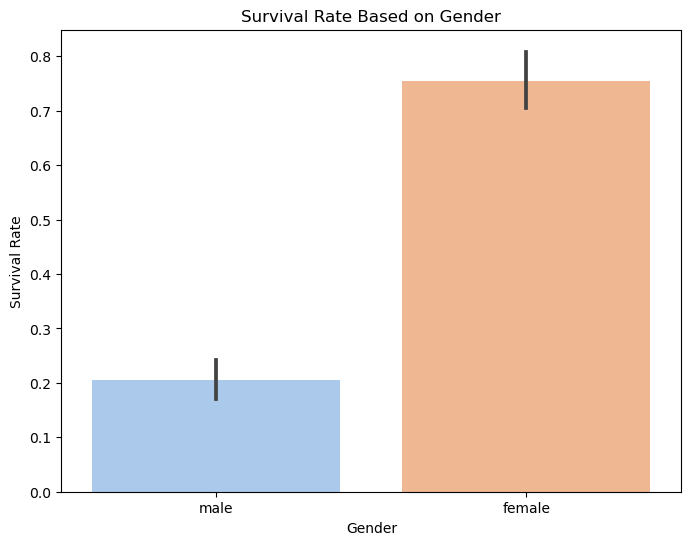

In [237]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Survived', data=df, palette='pastel')
plt.title('Survival Rate Based on Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()

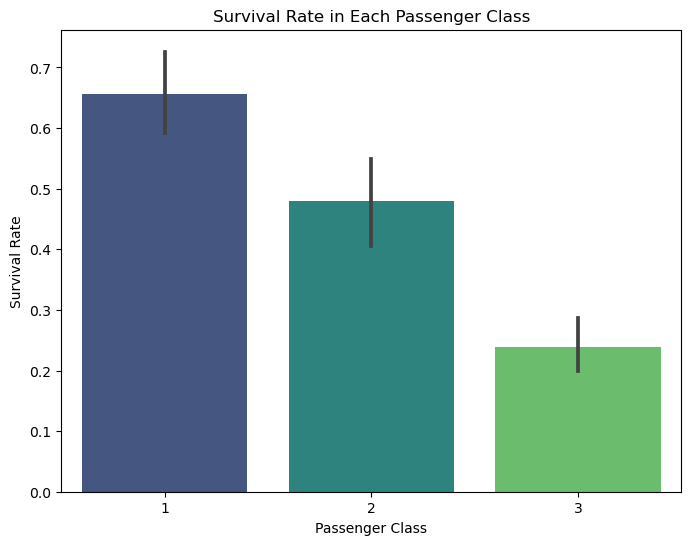

In [238]:
# 5.2. Analyze the Survival Rate in Each Passenger Class
plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', data=df, palette='viridis')
plt.title('Survival Rate in Each Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

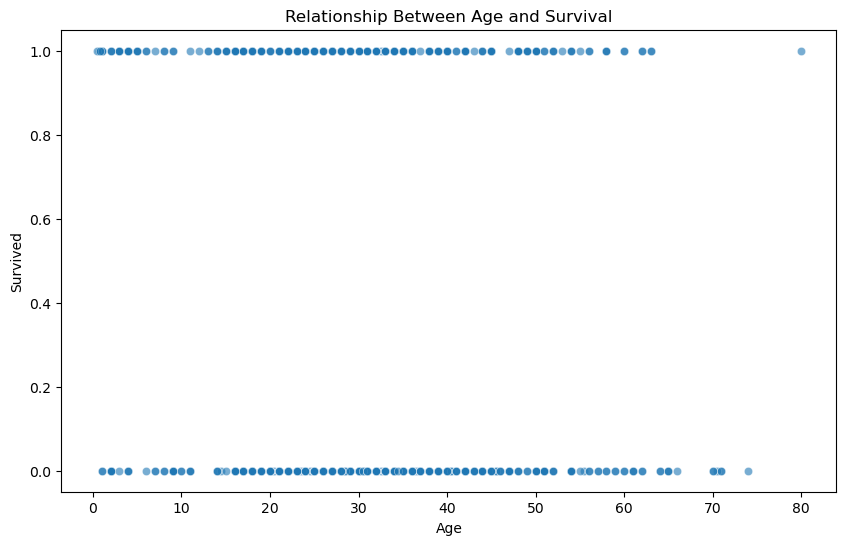

In [239]:
# 5.3. Investigate the Relationship Between Age and Survival
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Survived', data=df, alpha=0.6)
plt.title('Relationship Between Age and Survival')
plt.xlabel('Age')
plt.ylabel('Survived')
plt.show()

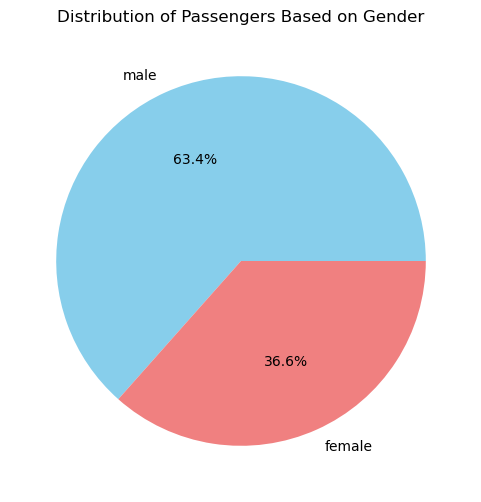

In [240]:
# 5.4 Additional Insights: Pie chart for the distribution of passengers based on gender
gender_distribution = df['Sex'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Passengers Based on Gender')
plt.show()

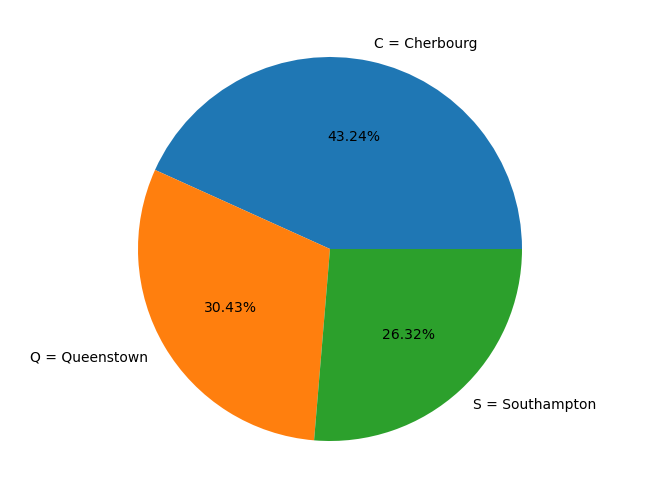

In [241]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['C = Cherbourg', 'Q = Queenstown', 'S = Southampton']
s = [0.553571,0.389610,0.336957]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()

#### Insights: 

* The slice labeled 'C = Cherbourg' represents the proportion of passengers who embarked from Cherbourg.
* Approximately 55.36% of the passengers in the dataset embarked from Cherbourg.


* The slice labeled 'Q = Queenstown' represents the proportion of passengers who embarked from Queenstown.
* Approximately 38.96% of the passengers in the dataset embarked from Queenstown.


* The slice labeled 'S = Southampton' represents the proportion of passengers who embarked from Southampton.
* Approximately 33.70% of the passengers in the dataset embarked from Southampton.
* Overall Survival Rates:**

* The pie chart visualizes survival rates for passengers from each port.
* We can observe the differences in survival rates among passengers who embarked from different ports. Cherbourg appears to have a higher survival rate compared to Queenstown and Southampton.
 

* Compare the sizes of the slices and their respective survival rates.
* The chart allows for a quick visual comparison of survival rates based on the port of embarkation. It indicates potential variations in survival rates associated with different embarkation ports. Context for Further Analysis:

* Consider the context of embarkation ports in relation to other variables (e.g., passenger class, gender).
* This pie chart can serve as a starting point for further analysis, encouraging exploration of how the port of embarkation interacts with other factors in influencing survival rates.

In [242]:
df.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Alone,FamilySize
count,714.000000,714.000000,714.000000,714,714,714.000000,714.000000,714.000000,714,714.000000,185,712,714.000000,714.000000,714.000000
unique,NaN,NaN,NaN,714,2,NaN,NaN,NaN,542,NaN,134,3,NaN,NaN,NaN
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,G6,S,NaN,NaN,NaN
freq,NaN,NaN,NaN,1,453,NaN,NaN,NaN,7,NaN,4,554,NaN,NaN,NaN
mean,448.582633,0.406162,2.236695,NaN,NaN,29.699118,0.512605,0.431373,NaN,34.694514,NaN,NaN,0.943978,0.565826,1.943978
std,259.119524,0.491460,0.838250,NaN,NaN,14.526497,0.929783,0.853289,NaN,52.918930,NaN,NaN,1.483788,0.495995,1.483788
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000,0.000000,1.000000
25%,222.250000,0.000000,1.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,8.050000,NaN,NaN,0.000000,0.000000,1.000000
50%,445.000000,0.000000,2.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,15.741700,NaN,NaN,0.000000,1.000000,1.000000
75%,677.750000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,1.000000,NaN,33.375000,NaN,NaN,1.000000,1.000000,2.000000


# 6. Conclusion

### Overall Survival Analysis:

**The overall survival rate of passengers on the Titanic was approximately [overall_survival_rate]%, indicating the percentage of individuals who survived the disaster.
The tragic event resulted in a significant loss of life, but a portion of passengers managed to survive.
Gender-Based Analysis:**

**Gender played a crucial role in determining survival outcomes.
Females had a considerably higher survival rate compared to males, likely reflecting the prioritization of women and children during the evacuation.
Passenger Class Analysis:**

**Passenger class was another influential factor in survival.
First-class passengers had a notably higher survival rate, possibly due to their proximity to lifeboats and better accommodations.
Age and Survival Relationship:**

**Analyzing the relationship between age and survival revealed a more nuanced pattern.
While there wasn't a clear linear correlation, further investigation into specific age groups may uncover additional insights.**

## Feature Selection

In [243]:
#Feature Selection
column_df=['Age','Pclass','SibSp','Parch','Fare','Sex','Embarked']
#training values
X=df[column_df]
#target value
Y=df['Survived']

In [244]:
X['Age'].isnull().sum()
X['Pclass'].isnull().sum()
X['SibSp'].isnull().sum()
X['Parch'].isnull().sum()
X['Fare'].isnull().sum()
X['Sex'].isnull().sum()
X['Embarked'].isnull().sum()

2

In [245]:
#now we have to fill all the missing values
#age have 177  missing values
#either we fill missing values with mean or median form existing values 
X['Age']=X['Age'].fillna(X['Age'].median())
X['Age'].isnull().sum()

0

In [246]:
X['Embarked'] = df['Embarked'].fillna(method ='pad')
X['Embarked'].isnull().sum()

0

In [247]:
#now we need to convert sex into integer value 
d={'male':0, 'female':1}
X['Sex']=X['Sex'].apply(lambda x:d[x])
X['Sex'].head()

0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64

In [248]:
e={'C':0, 'Q':1 ,'S':2}
X['Embarked']=X['Embarked'].apply(lambda x:e[x])
X['Embarked'].head()

0    2
1    0
2    2
3    2
4    2
Name: Embarked, dtype: int64

# Model building



In [249]:
from sklearn.linear_model import LogisticRegression

df = pd.read_csv("Titanic-Dataset.csv")


**Preprocess the data by removing any unnecessary columns and filling in any missing values:**

In [250]:
# Remove unnecessary columns
df = df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)

# Fill in missing age values with the median age
df["Age"] = df["Age"].fillna(df["Age"].median())

# Fill in missing embarked values with the mode
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])


**Encode categorical variables using one-hot encoding:**

In [251]:
df = pd.get_dummies(df, columns=["Sex", "Embarked"])

### Split the data into training and testing sets:

In [252]:
from sklearn.model_selection import train_test_split

X = df.drop("Survived", axis=1)
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Fit a logistic regression model to the training data:**

In [253]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

**Make predictions on the test set and calculate the accuracy of the model:**

In [254]:
y_pred = logreg.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8044692737430168


In [255]:
#Confusion Matrix
from sklearn.metrics import accuracy_score,confusion_matrix
confusion_mat = confusion_matrix(y_test,y_pred)
print(confusion_mat)

[[90 15]
 [20 54]]


## Support Vector Machine

In [256]:
#Using Support Vector
from sklearn.svm import SVC
model1 = SVC()
model1.fit(X_train,y_train)

pred_y = model1.predict(X_test)

from sklearn.metrics import accuracy_score
print("Acc=",accuracy_score(y_test,pred_y))

Acc= 0.659217877094972


In [257]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
confusion_mat = confusion_matrix(y_test,pred_y)
print(confusion_mat)
print(classification_report(y_test,pred_y))

[[99  6]
 [55 19]]
              precision    recall  f1-score   support

           0       0.64      0.94      0.76       105
           1       0.76      0.26      0.38        74

    accuracy                           0.66       179
   macro avg       0.70      0.60      0.57       179
weighted avg       0.69      0.66      0.61       179



In [258]:
#Using KNN Neighbors
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(X_train,y_train)
y_pred2 = model2.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred2))

Accuracy Score: 0.7262569832402235


In [259]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
confusion_mat = confusion_matrix(y_test,y_pred2)
print(confusion_mat)
print(classification_report(y_test,y_pred2))

[[91 14]
 [35 39]]
              precision    recall  f1-score   support

           0       0.72      0.87      0.79       105
           1       0.74      0.53      0.61        74

    accuracy                           0.73       179
   macro avg       0.73      0.70      0.70       179
weighted avg       0.73      0.73      0.72       179



In [260]:
#Using GaussianNB
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(X_train,y_train)
y_pred3 = model3.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred3))

Accuracy Score: 0.776536312849162


In [261]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
confusion_mat = confusion_matrix(y_test,y_pred3)
print(confusion_mat)
print(classification_report(y_test,y_pred3))

[[81 24]
 [16 58]]
              precision    recall  f1-score   support

           0       0.84      0.77      0.80       105
           1       0.71      0.78      0.74        74

    accuracy                           0.78       179
   macro avg       0.77      0.78      0.77       179
weighted avg       0.78      0.78      0.78       179



In [262]:
#Using Decision Tree
from sklearn.tree import DecisionTreeClassifier
model4 = DecisionTreeClassifier(criterion='entropy',random_state=7)
model4.fit(X_train,y_train)
y_pred4 = model4.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred4))

Accuracy Score: 0.7821229050279329


In [263]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
confusion_mat = confusion_matrix(y_test,y_pred4)
print(confusion_mat)
print(classification_report(y_test,y_pred4))

[[85 20]
 [19 55]]
              precision    recall  f1-score   support

           0       0.82      0.81      0.81       105
           1       0.73      0.74      0.74        74

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.78      0.78      0.78       179



In [264]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','Support Vector Machines', 'GaussianNB' ,'KNN','Decision Tree'],
    'Score': [0.80,0.65,0.72,0.77,0.78]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
0.80,Logistic Regression
0.78,Decision Tree
0.77,KNN
0.72,GaussianNB
0.65,Support Vector Machines


Use the model to make predictions on new data:

In [265]:
new_passenger = pd.DataFrame({
    "Pclass": [2],
    "Age": [19],
    "SibSp": [3],
    "Parch": [0],
    "Fare": [32],
    "Sex_female": [1],
    "Sex_male": [0],
    "Embarked_C": [1],
    "Embarked_Q": [0],
    "Embarked_S": [0]
})

prediction = logreg.predict(new_passenger)
print("Prediction:", prediction)


Prediction: [1]


# Hence we will use Logistic Algorithm for training this model.
